Chapter 20
# 可视化剖面线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 导入符号变量
import os

from matplotlib import cm
# 导入色谱模块

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义符号函数

In [3]:
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [4]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 2. 剖面线，平行于xy

In [5]:
xx, yy = mesh(num = 121)
ff = f_xy_fcn(xx,yy)

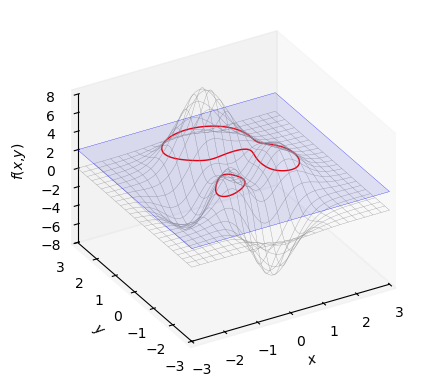

In [13]:
z_level = 2
# 指定 z 轴高度

xx_, yy_ = np.meshgrid(np.linspace(-3, 3, 2),np.linspace(-3, 3, 2))

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# 绘制剖面
zz_ = np.zeros_like(xx_) + z_level
ax.plot_surface(xx_, yy_, zz_, color = 'b', alpha = 0.1)
ax.plot_wireframe(xx_, yy_, zz_, color = 'b', 
                  lw = 0.2)

# 绘制网格曲面
ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

# 绘制指定一条剖面线
ax.contour(xx, yy, ff,
           levels = [z_level],
           colors = 'r',
           linewidths = 1)

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{f}$($\it{x}$,$\it{y}$)')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/剖面线，平行于xy.svg', format='svg')

### 3. 剖面线，平行于 xz

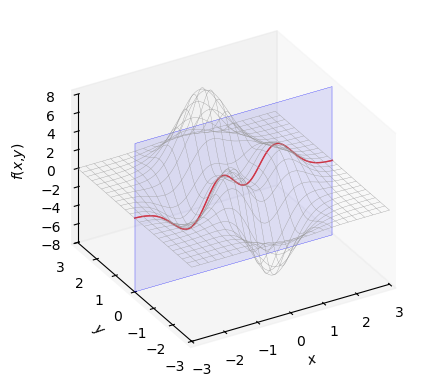

In [12]:
y_level = 0
xx_, zz_ = np.meshgrid(np.linspace(-3, 3, 2),np.linspace(-8, 8, 2))

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# 绘制剖面
ax.plot_surface(xx_, xx_*0 + y_level, zz_, color = 'b', alpha = 0.1)
ax.plot_wireframe(xx_, xx_*0 + y_level, zz_, color = 'b', 
                  lw = 0.2)

# 绘制曲面网格
ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

# 绘制指定一条剖面线
x_array = np.linspace(-3,3,101)
y_array = x_array*0 + y_level
ax.plot(x_array, y_array, f_xy_fcn(x_array,y_array),
        color = 'r', lw = 1)

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{f}$($\it{x}$,$\it{y}$)')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/剖面线，平行于xz.svg', format='svg')

### 4. 剖面线，平行于 yz

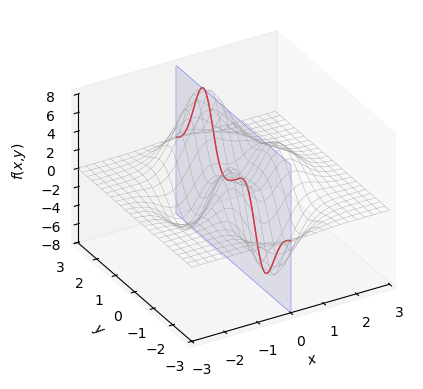

In [10]:
x_level = 0
yy_, zz_ = np.meshgrid(np.linspace(-3, 3, 2),np.linspace(-8, 8, 2))

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_surface(yy_*0 + x_level, yy_, zz_, color = 'b', alpha = 0.1)
ax.plot_wireframe(yy_*0 + x_level, yy_, zz_, color = 'b', 
                  lw = 0.2)

ax.plot_wireframe(xx,yy, ff,
                  color = [0.6, 0.6, 0.6],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

y_array = np.linspace(-3,3,101)

# 绘制指定一条剖面线
x_array = y_array*0 + x_level
ax.plot(x_array, y_array, f_xy_fcn(x_array,y_array),
        color = 'r', lw = 1)

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{f}$($\it{x}$,$\it{y}$)')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8, 8)
ax.view_init(azim=-120, elev=30)
ax.grid(False)
fig.savefig('Figures/剖面线，yz.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023